      Vterm Euler >  6.799999266284336
Vterm Runge-Kutta >  6.799992501445753


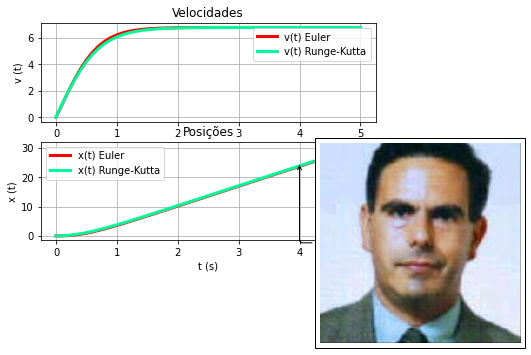

In [13]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.patches import Circle
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data


def acelera(t, xx, vx):    
    return g - g/vtx**2 * np.abs(vx) * vx

def rk4(t,x,vx,dt):    
    ax1=acelera(t,x,vx)
    c1v=ax1*dt
    c1x=vx*dt
    ax2=acelera(t+dt/2.,x+c1x/2.,vx+c1v/2.)
    c2v=ax2*dt
    c2x=(vx+c1v/2.)*dt			# predicto:  vx(t+dt) * dt
    ax3=acelera(t+dt/2.,x+c2x/2.,vx+c2v/2.)
    c3v=ax3*dt
    c3x=(vx+c2v/2.)*dt
    ax4=acelera(t+dt,x+c3x,vx+c3v)
    c4v=ax4*dt
    c4x=(vx+c3v)*dt
      
    xp=x+(c1x+2.*c2x+2.*c3x+c4x)/6.
    vxp=vx+(c1v+2.*c2v+2.*c3v+c4v)/6.
    return xp,vxp


# Gravidade
g = 9.8

# Massa
m = 1
k = 1
b = 0.05
a = 0.002
F0 = 7.5
wF = 1

# Tempo inicial e final
ti = 0
tf = 5

# Velocidade terminal
vtx = 6.8

# Posição e Velocidade inicial
xx0 = 0
vx0 = 0

# dt incremento do tempo e n numero de intervalos
dt = 0.1
n = int((tf - ti) / dt)

# Vetor tempo (n+1 para garantir que nao falta o ultimo dado (Ex: t[10]))
t = np.linspace(ti, tf, n + 1)

# Vetor velocidade (empty e não zeros para não alterar 
# muito o resultado se faltar analisar um dado)
xx = np.empty(n + 1)
vx = np.empty(n + 1)
ax = np.empty(n + 1)

xxrk4 = np.empty(n + 1)
vxrk4 = np.empty(n + 1)

# Introduzir x0 e v0 nos vetores da posição e velocidade
xx[0] = xx0
vx[0] = vx0
xxrk4[0] = xx0
vxrk4[0] = vx0


# Preencher os vetores x, v, a
for i in range(n):
    # Runge-Kutta
    xxrk4[i + 1], vxrk4[i + 1] = rk4(t[i], xxrk4[i], vxrk4[i], dt)

    # Euler
    ax[i] = acelera(t[i], xx[i], vx[i])
    vx[i + 1] = vx[i] + ax[i] * dt
    xx[i + 1] = xx[i] + vx[i] * dt
    
    
print("      Vterm Euler > ", vx[-1])
print("Vterm Runge-Kutta > ", vxrk4[-1])

fig, axs = plt.subplots(2)

    
# Plot
axs[0].set_title('Velocidades')
axs[0].plot(t, vx, label="v(t) Euler",  linestyle='-', linewidth=3, color="red")
axs[0].plot(t, vxrk4, label="v(t) Runge-Kutta",  linestyle='-', linewidth=3, color="mediumspringgreen")
axs[0].set(xlabel = "t (s)", ylabel = "v (t)")
axs[0].legend()         # Legenda só aparece com isto
axs[0].grid()

# Plot
axs[1].set_title('Posições')
axs[1].plot(t, xx, label="x(t) Euler",  linestyle='-', linewidth=3, color="red")
axs[1].plot(t, xxrk4, label="x(t) Runge-Kutta",  linestyle='-', linewidth=3, color="mediumspringgreen")
axs[1].set(xlabel = "t (s)", ylabel = "x (t)")
axs[1].legend()         # Legenda só aparece com isto
axs[1].grid()

xy = [4, 25]

# Annotate the 2nd position with another image (a Grace Hopper portrait)
#with get_sample_data("grace_hopper.jpg") as file:

arr_img = plt.imread("babau.jpg")

imagebox = OffsetImage(arr_img, zoom=1)
imagebox.image.axes = axs[1]

ab = AnnotationBbox(imagebox, xy,
                    xybox=(120., -80.),
                    xycoords='data',
                    boxcoords="offset points",
                    pad=0.5,
                    arrowprops=dict(
                        arrowstyle="->",
                        connectionstyle="angle,angleA=0,angleB=90,rad=3")
                    )

axs[1].add_artist(ab)